In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

import missingno as msno

from matplotlib import cm
from matplotlib import style
from matplotlib import font_manager
from matplotlib import rc

rc('font', family='Arial Unicode MS')

In [48]:
# 폐기물 처리현황 (생활계폐기물) 데이터 불러오기
df_waste_total = pd.read_csv('./datas/waste_total0210.csv', header=[0,1,2,3], index_col=[0,1,2])
df_waste_total

시도별(1)         1996                                                       \
시도별(1)           총계 종량제방식에의한혼합배출                                           
시도별(1)           소계          가연성                                           
시도별(1)           소계      음식물 채소류     종이류     나무류   고무피혁류   플라스틱류      기타   
합계 발생량 소계   49925.2      14531.8  6379.7  1856.7  1121.9  2166.4  4249.2   
   처리량 기타       0.0          0.0     0.0     0.0     0.0     0.0     0.0   
       매 립  34115.6      13486.4  5276.5  1420.7   997.6  1907.6  3816.5   
       소 각   2725.0        569.5   994.7   386.0   111.3   229.2   377.6   
       재활용  13084.6        475.9   108.5    50.0    13.0    29.6    55.1   

시도별(1)                              ...         2018                       \
시도별(1)                              ... 재활용가능자원 분리배출                        
시도별(1)         불연성                  ...          윤활유   형광등     고철류     의류   
시도별(1)         연탄재     금속류     토사류  ...           소계    소계      소계     소계   
합계 발생량 소계   1852.9  1547.4  1410.1  ...         25.4  91.4  1420.2  193.3   
   처리량 기타      0.0     0.0     0.0  ...          0.0   0.0     0.0    0.0   
       매 립  1821.6  1408.2  1372.0  ...          0.0   0.0     0.0    0.0   
       소 각     0.0    12.0     0.0  ...          0.0   0.0     0.0    0.0   
       재활용    31.3   127.2    38.1  ...         25.4  91.4  1420.2  193.3   

시도별(1)                                                      
시도별(1)                                         음식물류폐기물분리배출  
시도별(1)      영농폐기물    가구류  폐식용유  재활용잔재물      기타          소계  
시도별(1)         소계     소계    소계      소계      소계          소계  
합계 발생량 소계   447.6  670.1  58.7  1546.5  1052.1     14477.2  
   처리량 기타     0.0    0.0   0.0     0.0     0.0         0.0  
       매 립    0.0    0.0   0.0     0.0     0.0       140.6  
       소 각    0.0    0.0   0.0     0.0     0.0       297.0  
       재활용  447.6  670.1  58.7  1546.5  1052.1     14039.6  

[5 rows x 536 columns]

In [20]:
df_waste_total.index.values

array([('합계', '발생량', '소계'), ('합계', '처리량', '기타'), ('합계', '처리량', '매 립'),
       ('합계', '처리량', '소 각'), ('합계', '처리량', '재활용')], dtype=object)

In [21]:
df_waste_total.index = ['발생량', '기타 처리량', '매립 처리량', '소각 처리량', '재활용 처리량']

In [22]:
df_waste_total_t = df_waste_total.T
df_waste_total_t

발생량  기타 처리량   매립 처리량  소각 처리량  재활용 처리량
시도별(1) 시도별(1)       시도별(1) 시도별(1)                                            
1996   총계           소계     소계       49925.2     0.0  34115.6  2725.0  13084.6
       종량제방식에의한혼합배출 가연성    음식물 채소류  14531.8     0.0  13486.4   569.5    475.9
                           종이류       6379.7     0.0   5276.5   994.7    108.5
                           나무류       1856.7     0.0   1420.7   386.0     50.0
                           고무피혁류     1121.9     0.0    997.6   111.3     13.0
...                                     ...     ...      ...     ...      ...
2018   재활용가능자원 분리배출 가구류    소계         670.1     0.0      0.0     0.0    670.1
                    폐식용유   소계          58.7     0.0      0.0     0.0     58.7
                    재활용잔재물 소계        1546.5     0.0      0.0     0.0   1546.5
                    기타     소계        1052.1     0.0      0.0     0.0   1052.1
       음식물류폐기물분리배출  소계     소계       14477.2     0.0    140.6   297.0  14039.6

[536 rows x 5 columns]

In [23]:
df_waste_total_t.index.values[:10]

array([('1996', '총계', '소계', '소계'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '음식물 채소류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '종이류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '나무류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '고무피혁류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '플라스틱류'),
       ('1996', '종량제방식에의한혼합배출', '가연성', '기타'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '연탄재'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '금속류'),
       ('1996', '종량제방식에의한혼합배출', '불연성', '토사류')], dtype=object)

In [24]:
year = []
for i in range(0, len(df_waste_total_t.index)):
    year.append(df_waste_total_t.index.values[i][0])

In [25]:
# 연도 추가
df_waste_total_t['연도'] = year

In [26]:
# 보기 편하게 수정

gubun = []
for i in range(0, len(df_waste_total_t.index)):
    if df_waste_total_t.index.values[i][1] == '총계':
        gubun.append('총계')
    elif df_waste_total_t.index.values[i][1] == '종량제방식에의한혼합배출':
        gubun.append(df_waste_total_t.index.values[i][3]+'('+df_waste_total_t.index.values[i][2]+')')
    elif df_waste_total_t.index.values[i][1] == '재활용가능자원 분리배출':
        gubun.append(df_waste_total_t.index.values[i][2])
    elif df_waste_total_t.index.values[i][1] == '음식물류폐기물분리배출':
        gubun.append('음식물류')

In [27]:
gubun[:20]

['총계',
 '음식물 채소류(가연성)',
 '종이류(가연성)',
 '나무류(가연성)',
 '고무피혁류(가연성)',
 '플라스틱류(가연성)',
 '기타(가연성)',
 '연탄재(불연성)',
 '금속류(불연성)',
 '토사류(불연성)',
 '기타(불연성)',
 '종이류',
 '유리병류',
 '캔류',
 '플라스틱류',
 '고철류',
 '기타',
 '총계',
 '음식물 채소류(가연성)',
 '종이류(가연성)']

In [28]:
# 기타 : 재활용가능자원 분리배출의 '기타'

In [29]:
len(gubun)

536

In [30]:
# 알아보기 편하게 인덱스 수정
df_waste_total_t.index = gubun

In [31]:
df_waste_total_t

,발생량,기타 처리량,매립 처리량,소각 처리량,재활용 처리량,연도
총계,49925.2,0.0,34115.6,2725.0,13084.6,1996
음식물 채소류(가연성),14531.8,0.0,13486.4,569.5,475.9,1996
종이류(가연성),6379.7,0.0,5276.5,994.7,108.5,1996
나무류(가연성),1856.7,0.0,1420.7,386.0,50.0,1996
고무피혁류(가연성),1121.9,0.0,997.6,111.3,13.0,1996
...,...,...,...,...,...,...
가구류,670.1,0.0,0.0,0.0,670.1,2018
폐식용유,58.7,0.0,0.0,0.0,58.7,2018
재활용잔재물,1546.5,0.0,0.0,0.0,1546.5,2018
기타,1052.1,0.0,0.0,0.0,1052.1,2018


In [32]:
df_waste_total_t.columns

Index(['발생량', '기타 처리량', '매립 처리량', '소각 처리량', '재활용 처리량', '연도'], dtype='object')

In [33]:
# 컬럼 순서 변경
cols = df_waste_total_t.columns[[5,0,2,3,4,1]]
df_waste_total_t = df_waste_total_t[cols]

In [34]:
df_waste_total_t.head(20)

,연도,발생량,매립 처리량,소각 처리량,재활용 처리량,기타 처리량
총계,1996,49925.2,34115.6,2725.0,13084.6,0.0
음식물 채소류(가연성),1996,14531.8,13486.4,569.5,475.9,0.0
종이류(가연성),1996,6379.7,5276.5,994.7,108.5,0.0
나무류(가연성),1996,1856.7,1420.7,386.0,50.0,0.0
고무피혁류(가연성),1996,1121.9,997.6,111.3,13.0,0.0
플라스틱류(가연성),1996,2166.4,1907.6,229.2,29.6,0.0
기타(가연성),1996,4249.2,3816.5,377.6,55.1,0.0
연탄재(불연성),1996,1852.9,1821.6,0.0,31.3,0.0
금속류(불연성),1996,1547.4,1408.2,12.0,127.2,0.0
토사류(불연성),1996,1410.1,1372.0,0.0,38.1,0.0


# 음식물류 폐기물 연도별 변화추이 (시도별 구분)

In [61]:
# 음식물 관련만 추출 (음식물류, 음식물 채소류(가연성))
df_waste_for_food = df_waste_total_t.loc[['음식물류','음식물 채소류(가연성)']]
df_waste_for_food

,연도,발생량,매립 처리량,소각 처리량,재활용 처리량,기타 처리량
음식물류,2006,11462.8,44.6,179.7,10989.3,249.2
음식물류,2007,13753.7,165.3,363.8,13224.5,0.0
음식물류,2008,14026.2,97.0,312.3,13616.9,0.0
음식물류,2009,13701.1,66.7,300.1,13334.3,0.0
음식물류,2010,13428.6,108.3,288.0,13032.3,0.0
음식물류,2011,13264.2,102.5,276.5,12885.2,0.0
음식물류,2012,13036.9,88.5,286.4,12662.0,0.0
음식물류,2013,12501.2,105.7,296.0,12099.5,0.0
음식물류,2014,13221.5,125.1,247.7,12848.7,0.0
음식물류,2015,14219.5,159.9,329.8,13729.8,0.0


In [65]:
# 전국 발생량 파악
waste_food = df_waste_for_food[['연도', '발생량']]
waste_food

,연도,발생량
음식물류,2006,11462.8
음식물류,2007,13753.7
음식물류,2008,14026.2
음식물류,2009,13701.1
음식물류,2010,13428.6
음식물류,2011,13264.2
음식물류,2012,13036.9
음식물류,2013,12501.2
음식물류,2014,13221.5
음식물류,2015,14219.5


<AxesSubplot:>

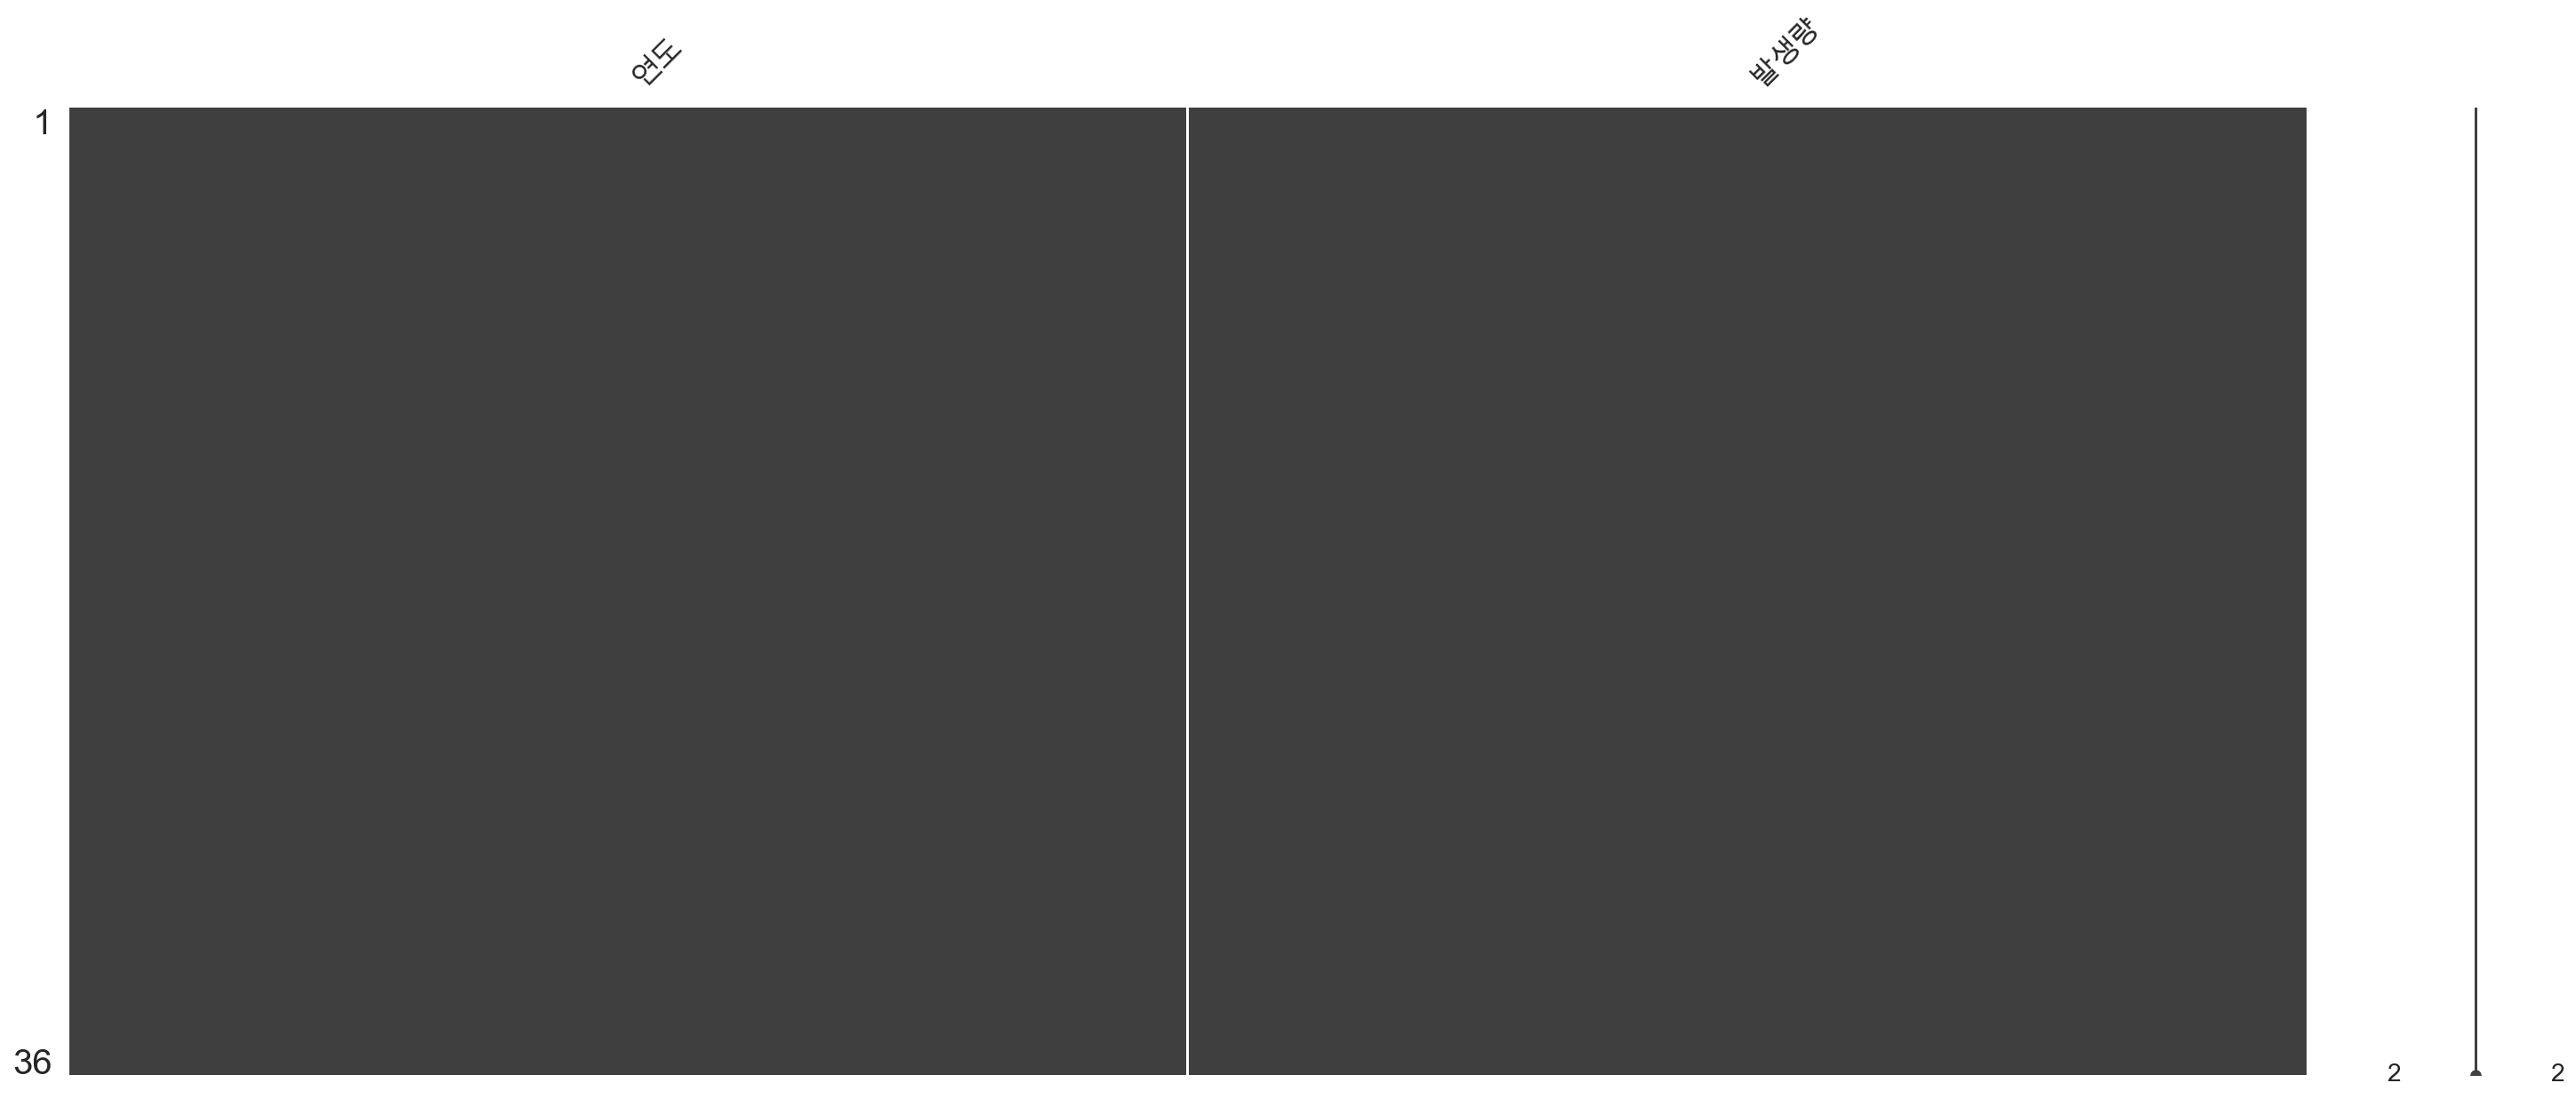

In [63]:
msno.matrix(waste_food)

In [66]:
# 연도 기준으로 합치기
df_waste_food = waste_food.groupby("연도").agg("sum")
df_waste_food

,발생량
연도,
1996,14531.8
1997,13062.7
1998,11797.9
1999,11577.1
2000,11434.1
2001,11236.6
2002,11397.4
2003,11398.4
2004,11463.6


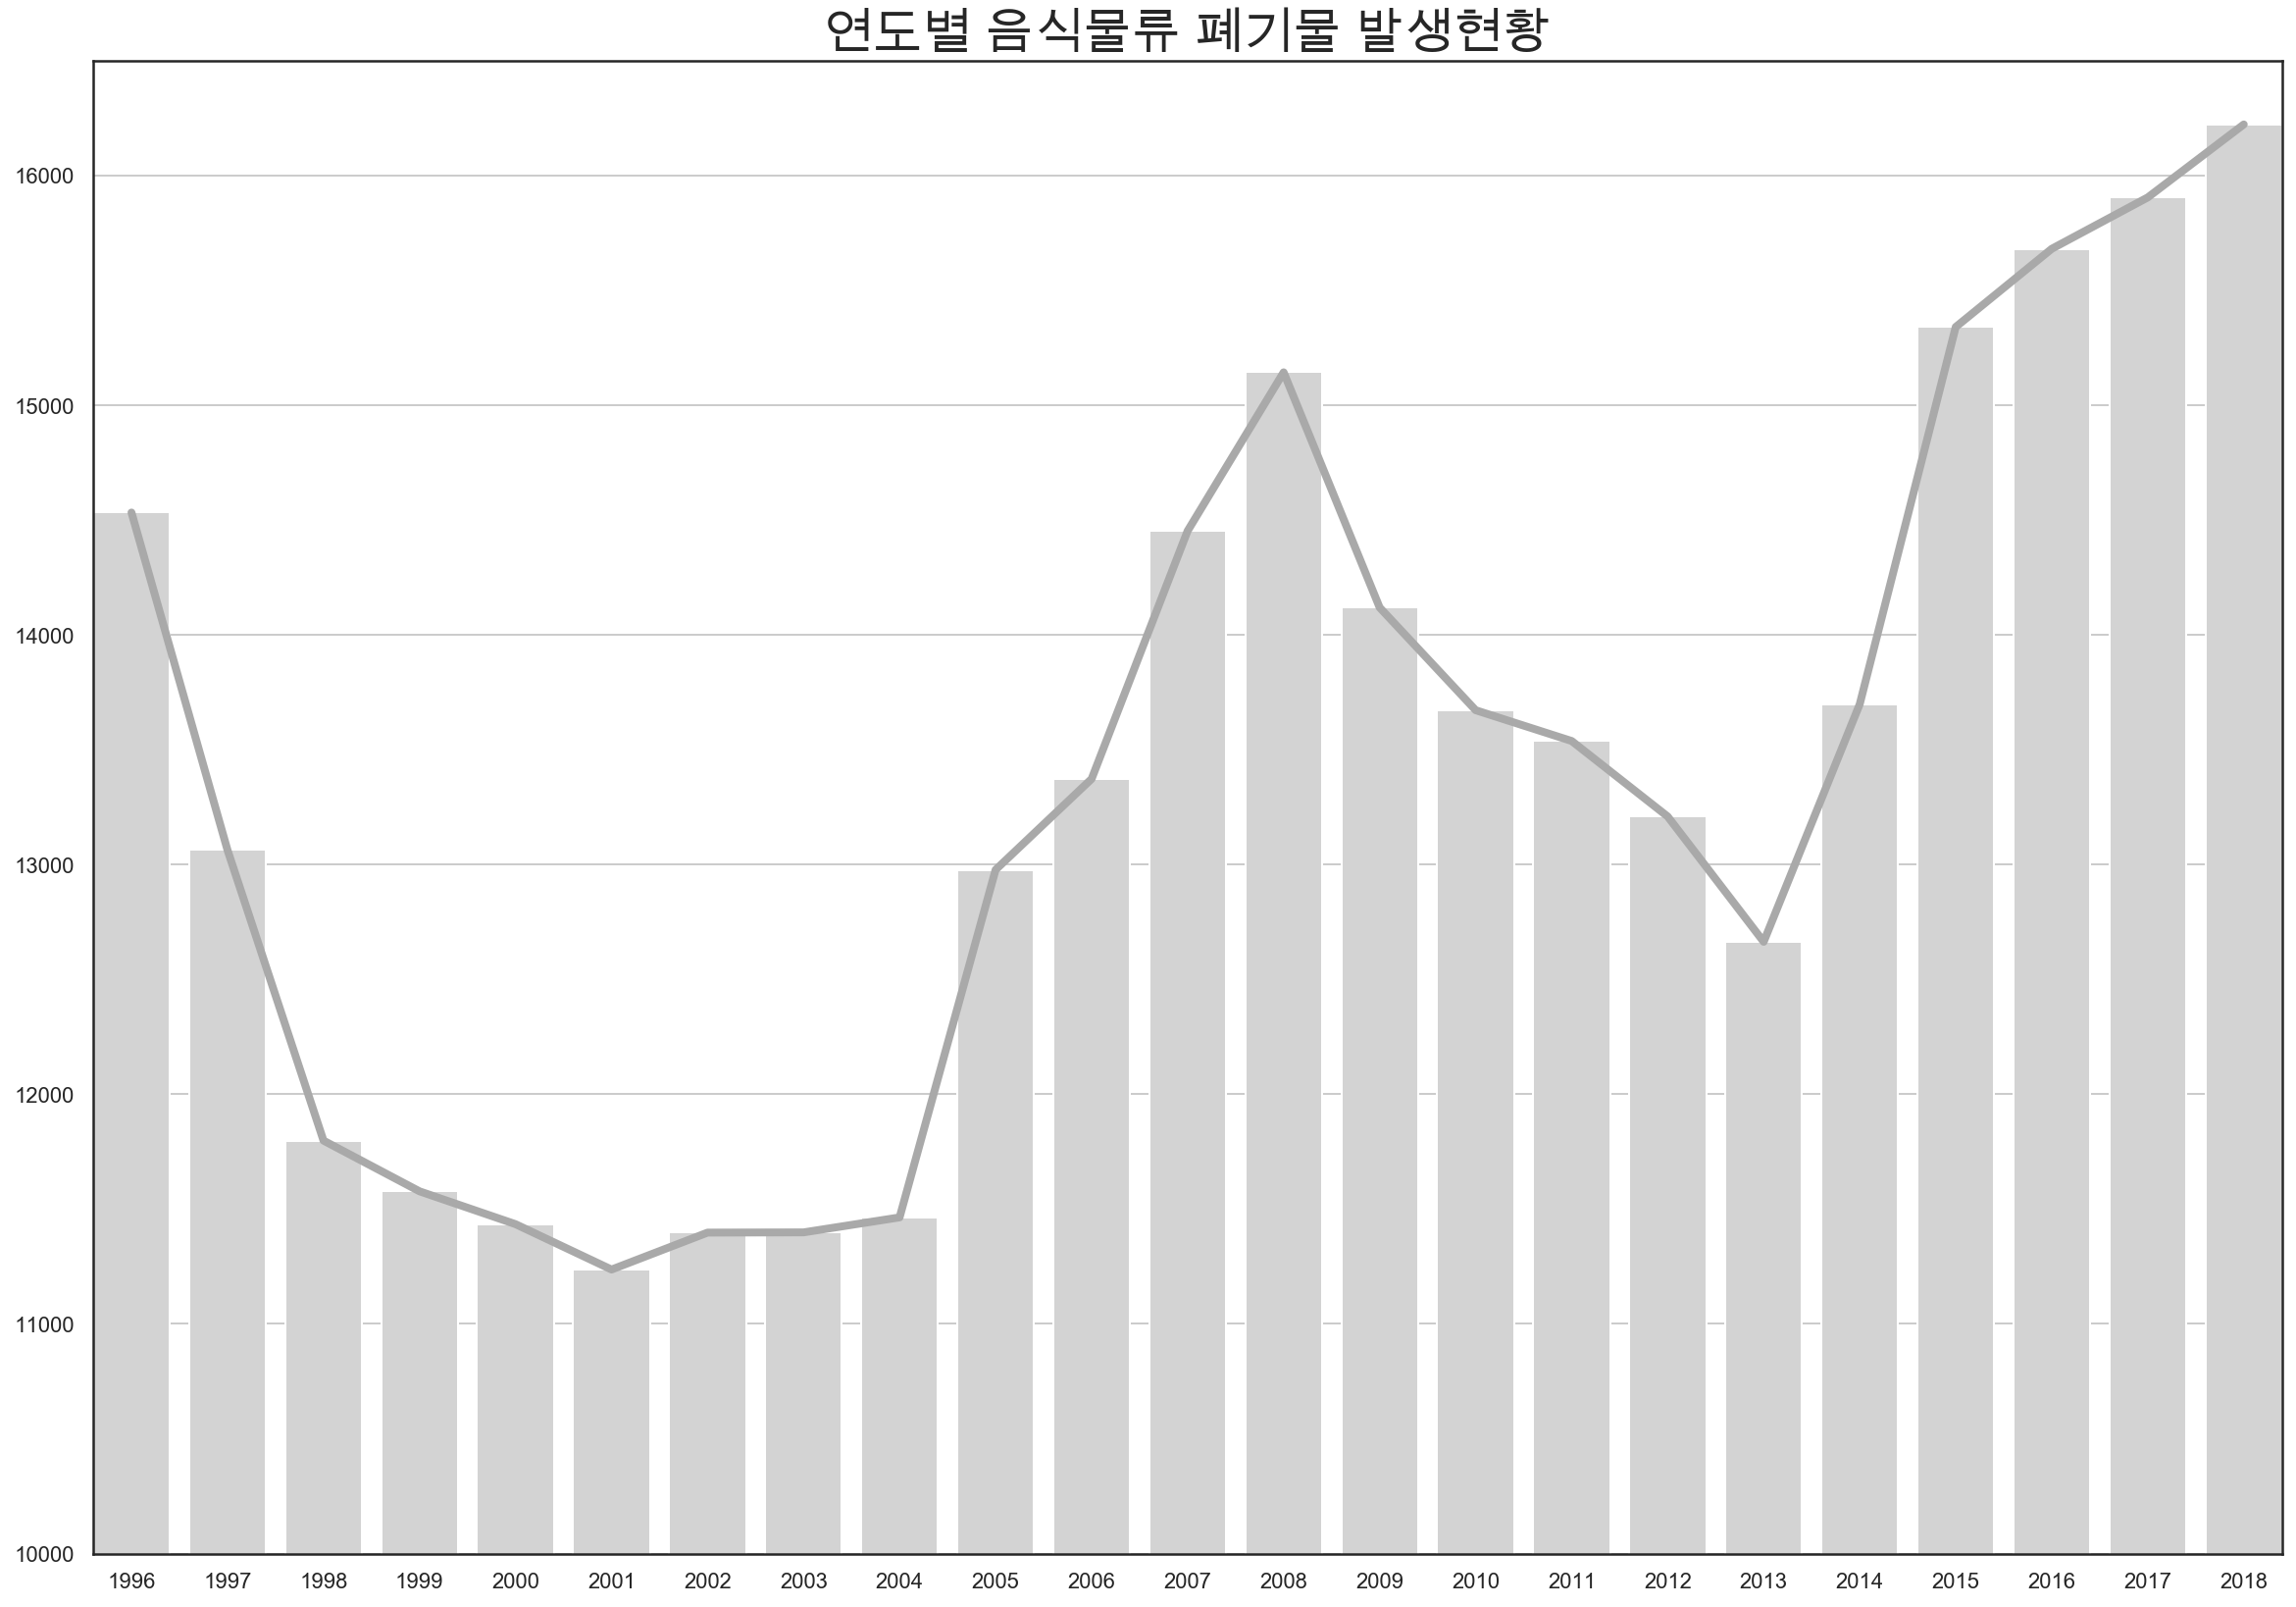

In [118]:
fig, ax = plt.subplots(figsize=(20, 14))

plt.plot(df_waste_food.index, df_waste_food['발생량'], color='darkgrey', linewidth=4)
ax.bar(df_waste_food.index, df_waste_food['발생량'], color='lightgrey')


ax.set_title('연도별 음식물류 폐기물 발생현황', fontsize=25)
# ax.set_title('(단위: 톤/일)', loc='right')
# ax.legend(df_bar.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)
ax.yaxis.grid()

ax.set_facecolor('none')
ax.margins(x=0, y=0)
ax.set(ylim=(10000, 16500))

plt.savefig('./image/waste_food.png', dpi=150, bbox_inches='tight')
plt.show()

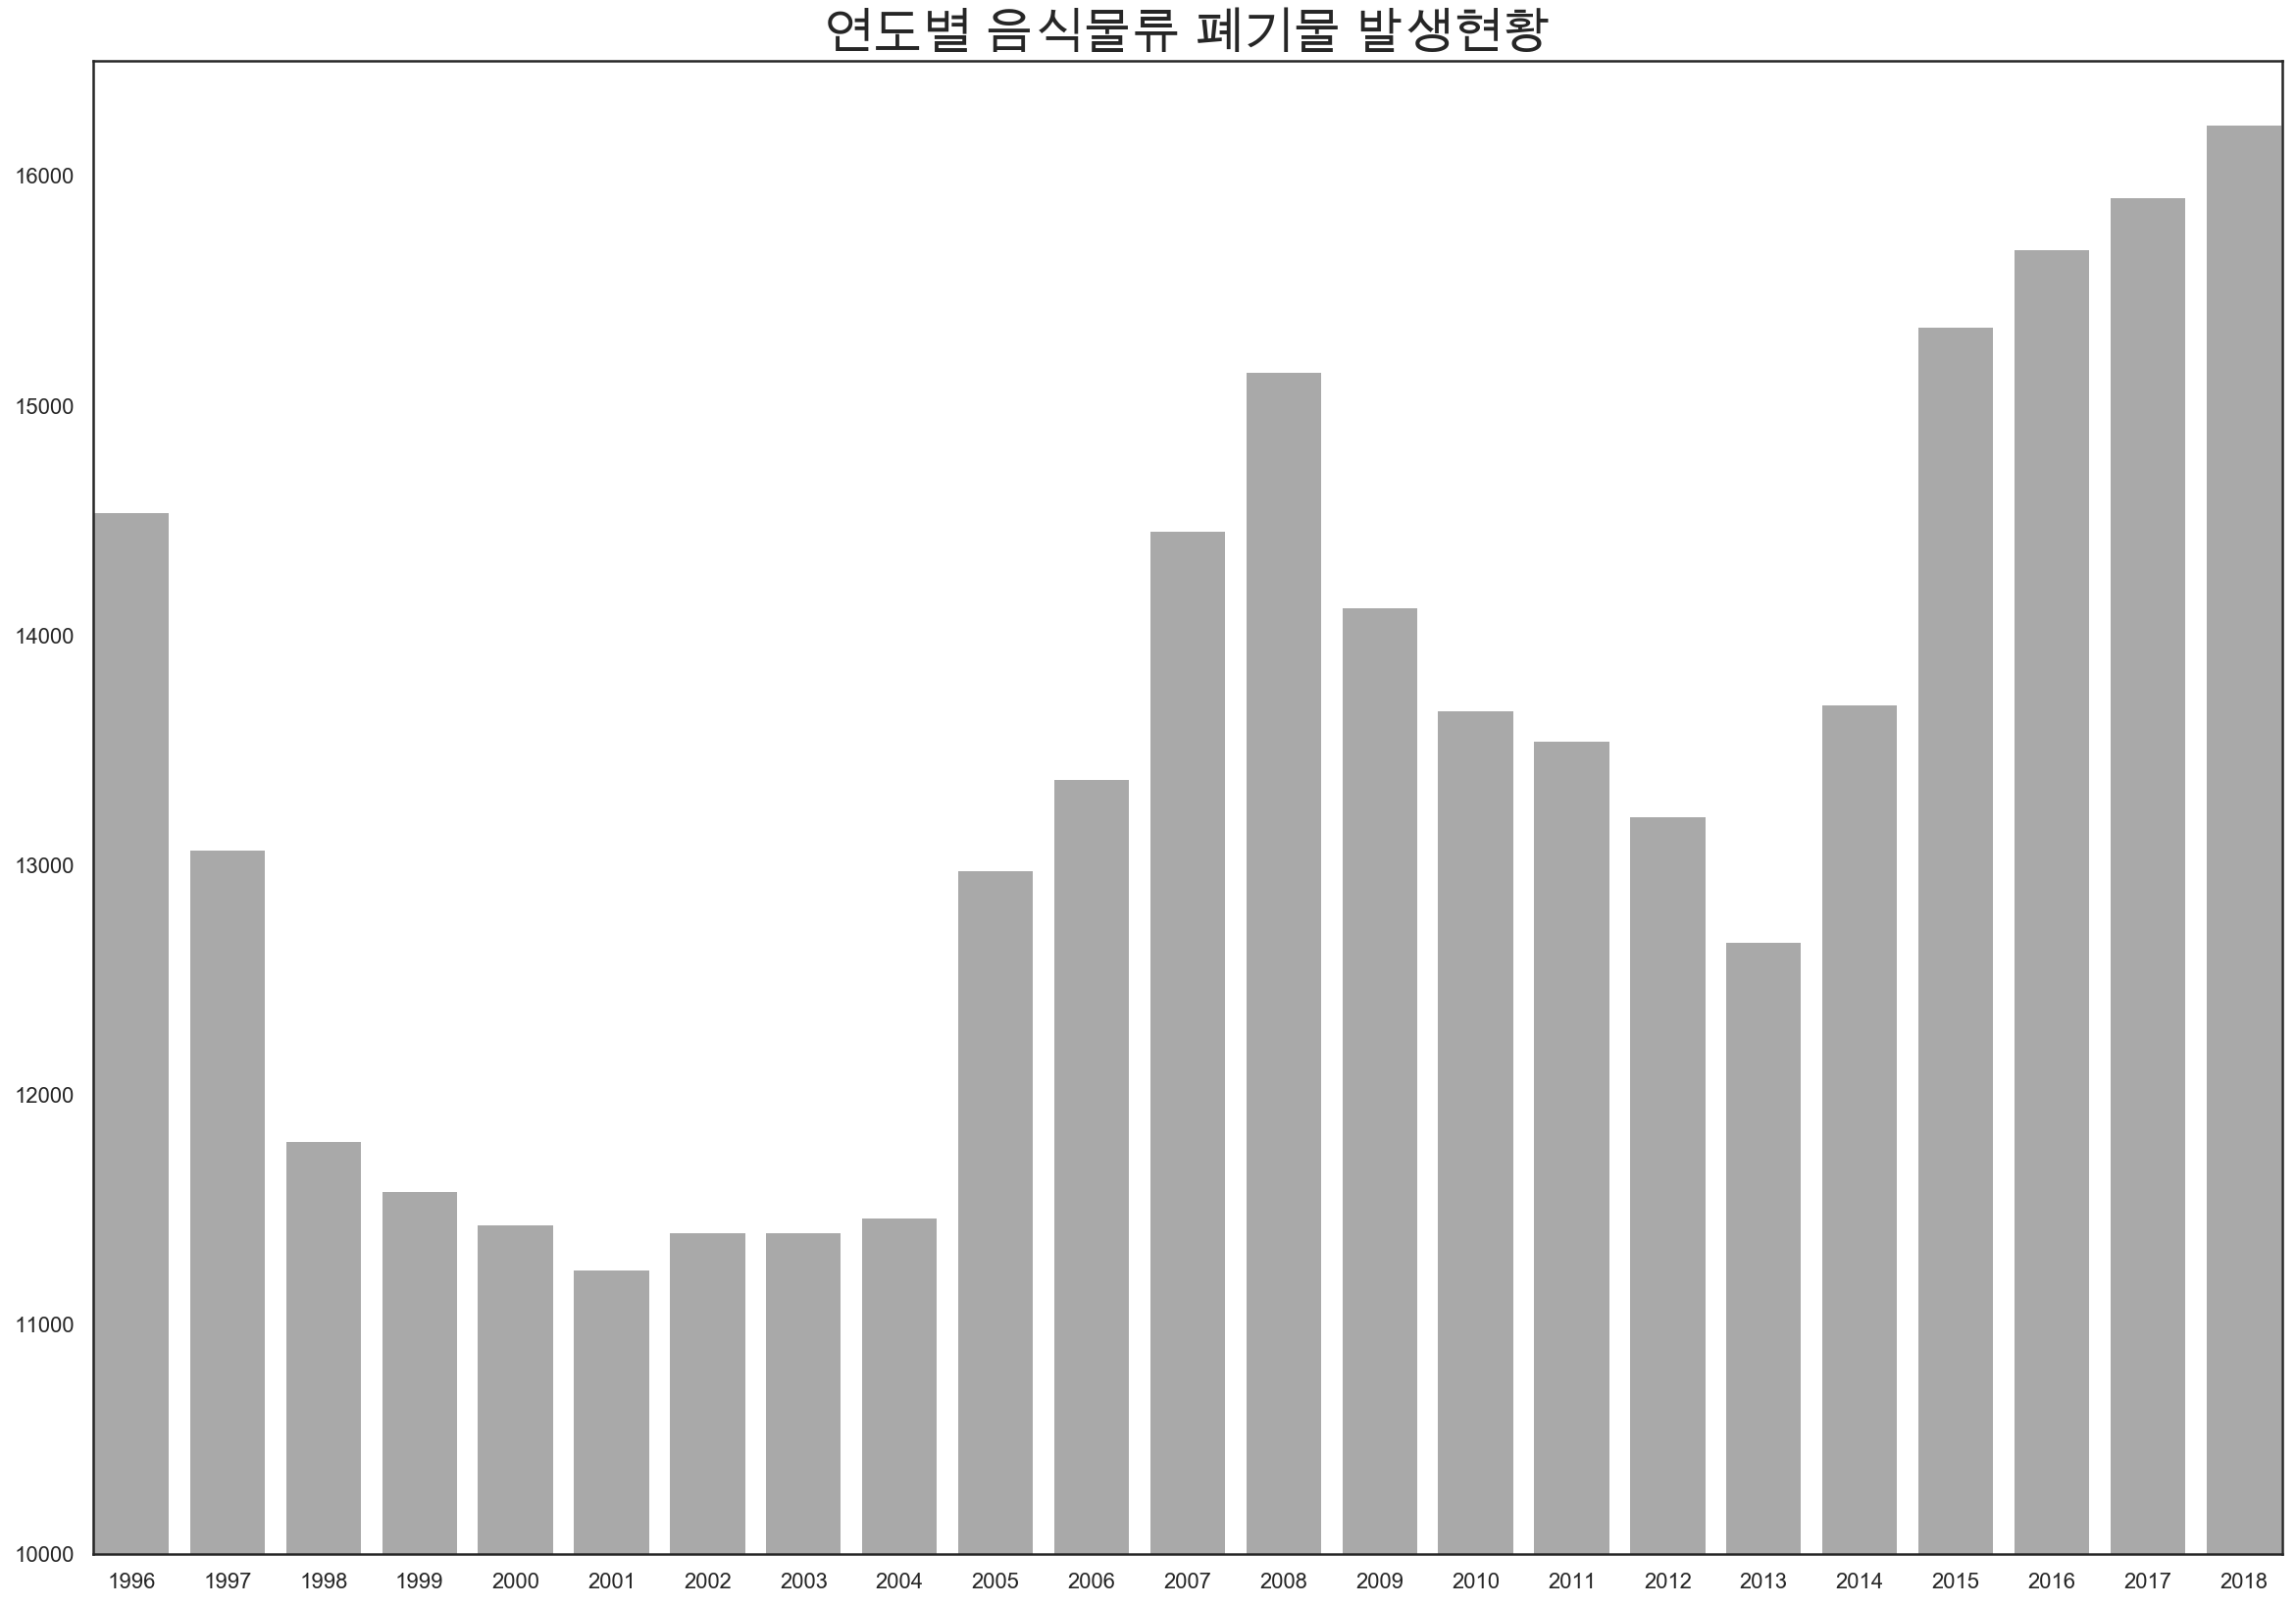

In [110]:
# fig, ax = plt.subplots(figsize=(20, 14))

# ax.bar(df_waste_food.index, df_waste_food['발생량'], color='darkgrey')

# ax.set_title('연도별 음식물류 폐기물 발생현황', fontsize=25)
# # ax.set_title('(단위: 톤/일)', loc='right')
# # ax.legend(df_bar.columns, bbox_to_anchor=(1, 0), loc='lower left', fontsize=15)

# ax.set_facecolor('none')
# ax.margins(x=0, y=0)
# ax.set(ylim=(10000, 16500))

# # plt.savefig('./image/waste_food_barplot.png', dpi=150, bbox_inches='tight')
# plt.show()